**2014
With over 1200 responses, we believe the 2014 Mental Health in Tech Survey was the largest survey done on mental health in the tech industry.**

This dataset contains the following data:

- Timestamp
- Age
- Gender
- Country
- state (If you live in the United States, which state or territory do you live in?)
- self_employed: Are you self-employed?
- family_history: Do you have a family history of mental illness?
- treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

Inspiration
Some questions worth exploring:

How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?

In [687]:
# classic importing of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [688]:
# loading data into pandas dataframe
survey = pd.read_csv('survey.csv')
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [689]:
# renaming columns to have all lowercase
survey.columns = [col.lower() for col in survey.columns]

# looking at dtypes, we can see all of them are pandas objects except for age that is int.
print(survey.dtypes)

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object


In [690]:
# after exploring some of the columns I have decided not to use the timestamp, state (if US) or comments columns.
survey.drop(['timestamp', 'state', 'comments', 'phys_health_consequence', 'phys_health_interview'], axis= 1, inplace= True)

In [691]:
# after finding some weird responses in the age column ('such as 99999999 and -1729')
# i decided to only include 'valid' numbers for age
survey['age'] = survey['age'].apply(lambda x: x if 0 < x < 100 else np.nan)

In [692]:
# gender is one big mess of data but I believe in myself
# first lower case and strip eveything to decrease options
survey['gender'] = survey['gender'].apply(lambda x: x.lower().strip())

# based on the replies made these lists manually, I hope to not offend anyone.
male = ['male', 'm', 'make', 'cis male', 'man', 'cis man', 'msle', 'malr', 'mail', 'maile', 'something kinda male?', 'ostensibly male, unsure what that really means', 'male-ish', 'guy (-ish) ^_^', 'mal', 'male (cis)']
female = ['female', 'f', 'woman', 'female (cis)', 'cis-female/femme', 'femake', 'cis female', 'femail']

def regender(gender_input):
    
    """
    I don't mean any offense.
    Input: a string about gender
    Output: male, female or other depending on our dictionary
    
    """ 
    if gender_input in male:
        return 'male'
    elif gender_input in female:
        return 'female'
    else:
        return 'other'
    
survey['gender'] = survey['gender'].apply(regender)

# check our final results
survey.gender.value_counts(dropna= False)

male      994
female    247
other      18
Name: gender, dtype: int64

In [693]:
for col in survey.columns:
    if survey[col].isnull().sum():
        print(col + ' (%): ' + str(sum(survey[col].isnull())/len(survey)))
        nan_cols += [col]

# at most there are 20% of values with nans so we'll replace with Don't know
# replace nans with 'No Answer'
for col in nan_cols:
    survey[col].fillna("Don't know", inplace= True)

# i'm just gonna drop the rows without age.
survey = survey[survey.age != "Don't know"]

age (%): 0.003971405877680699
self_employed (%): 0.014297061159650517
work_interfere (%): 0.2096902303415409


In [694]:
# it seems the rest of the columns are questions that might be yes or no, with few additional options
# we can identify that by checking the possible answers in ech question excluding the columns we already know
exclude = ['country', 'age']
possible_answers = {col:[i for i in survey[col].unique()] for col in survey.columns if col not in exclude}
possible_answers

{'gender': ['female', 'male', 'other'],
 'self_employed': ["Don't know", 'Yes', 'No'],
 'family_history': ['No', 'Yes'],
 'treatment': ['Yes', 'No'],
 'work_interfere': ['Often', 'Rarely', 'Never', 'Sometimes', "Don't know"],
 'no_employees': ['6-25',
  'More than 1000',
  '26-100',
  '100-500',
  '1-5',
  '500-1000'],
 'remote_work': ['No', 'Yes'],
 'tech_company': ['Yes', 'No'],
 'benefits': ['Yes', "Don't know", 'No'],
 'care_options': ['Not sure', 'No', 'Yes'],
 'wellness_program': ['No', "Don't know", 'Yes'],
 'seek_help': ['Yes', "Don't know", 'No'],
 'anonymity': ['Yes', "Don't know", 'No'],
 'leave': ['Somewhat easy',
  "Don't know",
  'Somewhat difficult',
  'Very difficult',
  'Very easy'],
 'mental_health_consequence': ['No', 'Maybe', 'Yes'],
 'coworkers': ['Some of them', 'No', 'Yes'],
 'supervisor': ['Yes', 'No', 'Some of them'],
 'mental_health_interview': ['No', 'Yes', 'Maybe'],
 'mental_vs_physical': ['Yes', "Don't know", 'No'],
 'obs_consequence': ['No', 'Yes']}

In [695]:
# i also want to normalize all 'half-answers' to 'Don't know', so changing 'Not sure' and 'Maybes'
def replace_uncertainty(survey_answer):
    uncertainty = ['Maybe', 'Some of them', 'Not sure']
    if survey_answer in uncertainty:
        return "Don't know"
    else:
        return survey_answer

# apply function to all columns
for col in survey.columns:
    survey[col] = survey[col].apply(replace_uncertainty)

In [696]:
# for now its feels like cleaning is done.
possible_answers = {col:[i for i in survey[col].unique()] for col in survey.columns if col not in exclude}
possible_answers

{'gender': ['female', 'male', 'other'],
 'self_employed': ["Don't know", 'Yes', 'No'],
 'family_history': ['No', 'Yes'],
 'treatment': ['Yes', 'No'],
 'work_interfere': ['Often', 'Rarely', 'Never', 'Sometimes', "Don't know"],
 'no_employees': ['6-25',
  'More than 1000',
  '26-100',
  '100-500',
  '1-5',
  '500-1000'],
 'remote_work': ['No', 'Yes'],
 'tech_company': ['Yes', 'No'],
 'benefits': ['Yes', "Don't know", 'No'],
 'care_options': ["Don't know", 'No', 'Yes'],
 'wellness_program': ['No', "Don't know", 'Yes'],
 'seek_help': ['Yes', "Don't know", 'No'],
 'anonymity': ['Yes', "Don't know", 'No'],
 'leave': ['Somewhat easy',
  "Don't know",
  'Somewhat difficult',
  'Very difficult',
  'Very easy'],
 'mental_health_consequence': ['No', "Don't know", 'Yes'],
 'coworkers': ["Don't know", 'No', 'Yes'],
 'supervisor': ['Yes', 'No', "Don't know"],
 'mental_health_interview': ['No', 'Yes', "Don't know"],
 'mental_vs_physical': ['Yes', "Don't know", 'No'],
 'obs_consequence': ['No', 'Yes']

**I was trying to come up with a question to ask the data but I wasn't feeling very creative.**
**So I'm gonna do an agnostic analysis and just make a correlation matrix bewteen all the variables.**

1. The first thing I'll do is encode all the answers as numbers

In [697]:
encoding_dict = {'No': -1, "Don't know": 0, 'Yes': 1,
                 'Never': -2, 'Rarely': -1, 'Sometimes': 1, 'Often': 2,
                 'Very difficult': -2, 'Somewhat difficult': -1, 'Somewhat easy': 1, 'Very easy': 2,
                 '1-5': 0, '6-25': 1, '26-100': 2, '100-500': 3, '500-1000': 4, 'More than 1000': 5,
                 'male': -1, 'other': 0, 'female': 1}

In [698]:
# made a copy just to check values
survey_coded = survey.copy()

# for each column except the ones not excluded change the values in our dictionary
for col in survey_coded.columns:
    if col not in exclude:
        survey_coded[col] = survey_coded[col].map(encoding_dict)

In [699]:
# make the correlation matrix
correlation = survey_coded.corr()

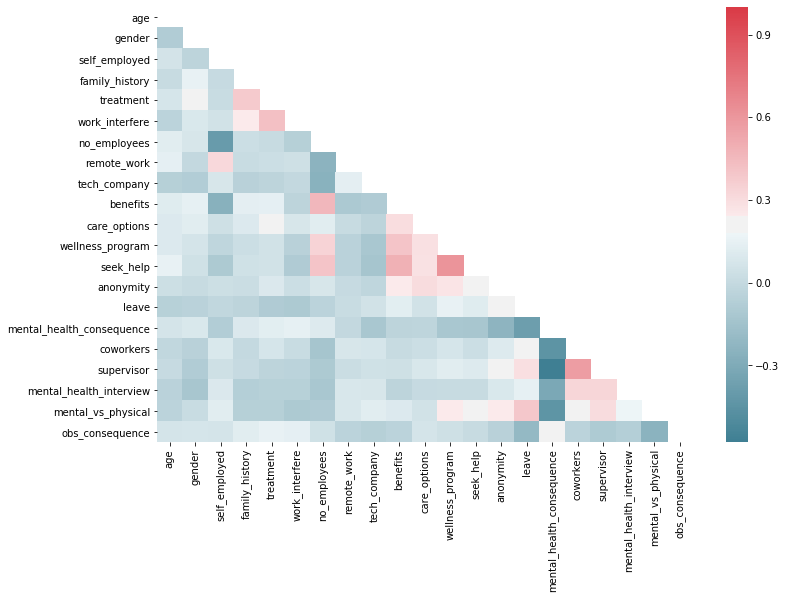

In [700]:
# making a mask to only show half the table cause its duplicated.
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# choosing colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, cmap=cmap, mask=mask, annot= False)

In [701]:
# let's narrow this down
survey_coded['employer_awareness'] = survey_coded['benefits'] + survey_coded['wellness_program'] + survey_coded['anonymity'] + survey_coded['seek_help'] + survey_coded['leave'] + survey_coded['obs_consequence'] + survey_coded['mental_health_consequence'] + survey_coded['mental_vs_physical']

In [702]:
survey_coded['personal_tendency'] = survey_coded['mental_health_interview'] + survey_coded['coworkers'] + survey_coded['care_options']

In [703]:
survey_coded['mental_illness'] = survey_coded['treatment'] + survey_coded['work_interfere']


In [704]:
survey_coded.drop(['benefits', 'wellness_program', 'anonymity', 'seek_help', 'leave', 'obs_consequence', 'mental_health_consequence', 'mental_vs_physical', 'mental_health_interview', 'coworkers', 'care_options', 'treatment', 'work_interfere'], axis= 1, inplace= True)

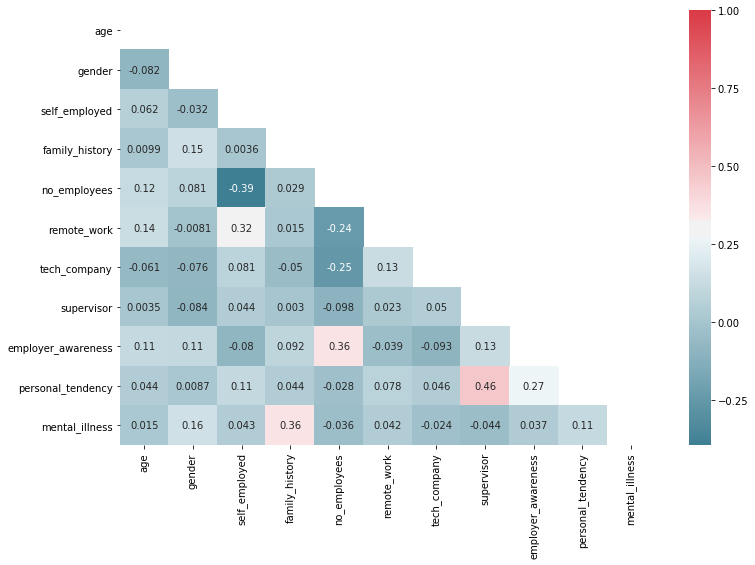

In [705]:
correlation = survey_coded.corr()
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# choosing colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, cmap=cmap, mask=mask, annot= True)

In [706]:
# variable to predict
Y = survey_coded['mental_illness']
exclude = ['treatment', 'country']
# i'm using a linear regression because I don't know which else to use
# also it makes sense to start by that one
X = survey_coded[['family_history', 'work_interfere', 'coworkers', 'care_options', 'gender']]

lm = LinearRegression()
model = lm.fit(X,Y)

print('Score (r-squared): ', lm.score(X,Y))
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
coeff_df.sort_values(by='Coefficient', ascending= False)

KeyError: "['coworkers', 'care_options', 'work_interfere'] not in index"